**Auswertung:**

- Layer Normalization seems to produce a better convergence of the q-values, but the reward, econs and MSTPC do strongly get better
- still, results are now **BETTER THAN THE BASELINE !!!**
- with layer normalization and ReLU (for SiLU we did not see this so strongly), outputs get very smooth, without more training

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s302/20210612-1948/",
            "../checkpoints/s302-ln/20210612-1948/",
            "../checkpoints/s302-longer/20210529-1205/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                            baseline_rule-based   
ddqn_new                                               0   
lr                                                  0.01   
batch_size                                           128   
lambda_rwd_mstpc                                     0.1   
lambda_rwd_energy                                  5e-06   
energy_cons_in_kWh                                     0   
log_rwd_energy                                         0   
reward_offset                                        0.0   
clip_econs_at                                        0.0   
soften_instead_of_clipping                             0   
ddqn_loss                                             L2   
target_network_update_freq                             3   
epsilon_final_step                                   100   
epsilon_decay_mode                           exponential   
episodes_count                                       100   
agent_init_gain                                      0.8   
use_layer_normalization                                0   
fewer_q_values                                         0   
agent_w_l2                                         1e-05   
network_storage_frequency                             10   
model                            Building_5ZoneAirCooled   
single_setpoint_agent_count                          all   
next_occ_horizont                                      0   
rulebased_setpoint_unoccu_delta                      7.0   

                                                                   s302  \
algorithm                                                          ddqn   
ddqn_new                                                              1   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.16   
lambda_rwd_energy                                                 0.017   
energy_cons_in_kWh                                                    1   
log_rwd_energy                                                        0   
reward_offset                                                       0.3   
clip_econs_at                                                     150.0   
soften_instead_of_clipping                                            0   
ddqn_loss                                                            L2   
target_network_update_freq                                            2   
epsilon_final_step                                                16000   
epsilon_decay_mode                                               linear   
episodes_count                                                      160   
agent_init_gain                                                     0.7   
use_layer_normalization                                               0   
fewer_q_values                                                        1   
agent_w_l2                                                        1e-06   
network_storage_frequency                                           160   
model                            Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                one_but2not5   
next_occ_horizont                                                     2   
rulebased_setpoint_unoccu_delta                                     7.0   

                                                                s302-ln  \
algorithm                                                          ddqn   
ddqn_new                                                              1   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.16   
lambda_rwd_energy                                                 0.017   
energy_cons_in_

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001          s302  \
Number of training episodes                      1.0  16000.000000   
Runtime in s                                     0.0  66212.334796   
Runtime in h                                     0.0     18.392315   
Mean episode runtime in s                        0.0      4.138271   
Mean episode runtime during eval. episode in s   0.0      4.207381   
Mean episode runtime after eval. episode in s    NaN      4.082235   
Mean episode runtime in no eval. episode in s    NaN      4.137836   

                                                     s302-ln    s302-longer  
Number of training episodes                     16000.000000   29600.000000  
Runtime in s                                    76831.106828  117208.364448  
Runtime in h                                       21.341974      32.557879  
Mean episode runtime in s                           4.801944       3.959742  
Mean episode runtime during eval. episode in s      4.839028       4.123038  
Mean episode runtime after eval. episode in s       4.750446       3.920594  
Mean episode runtime in no eval. episode in s       4.801711       3.958715

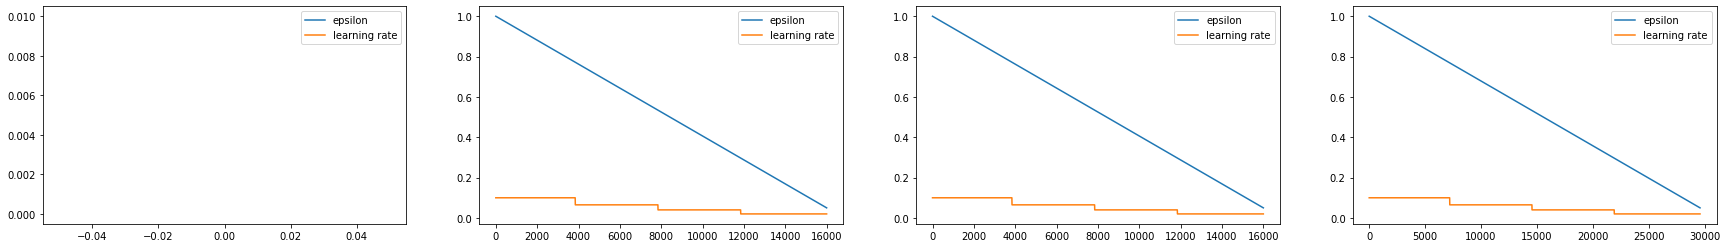

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

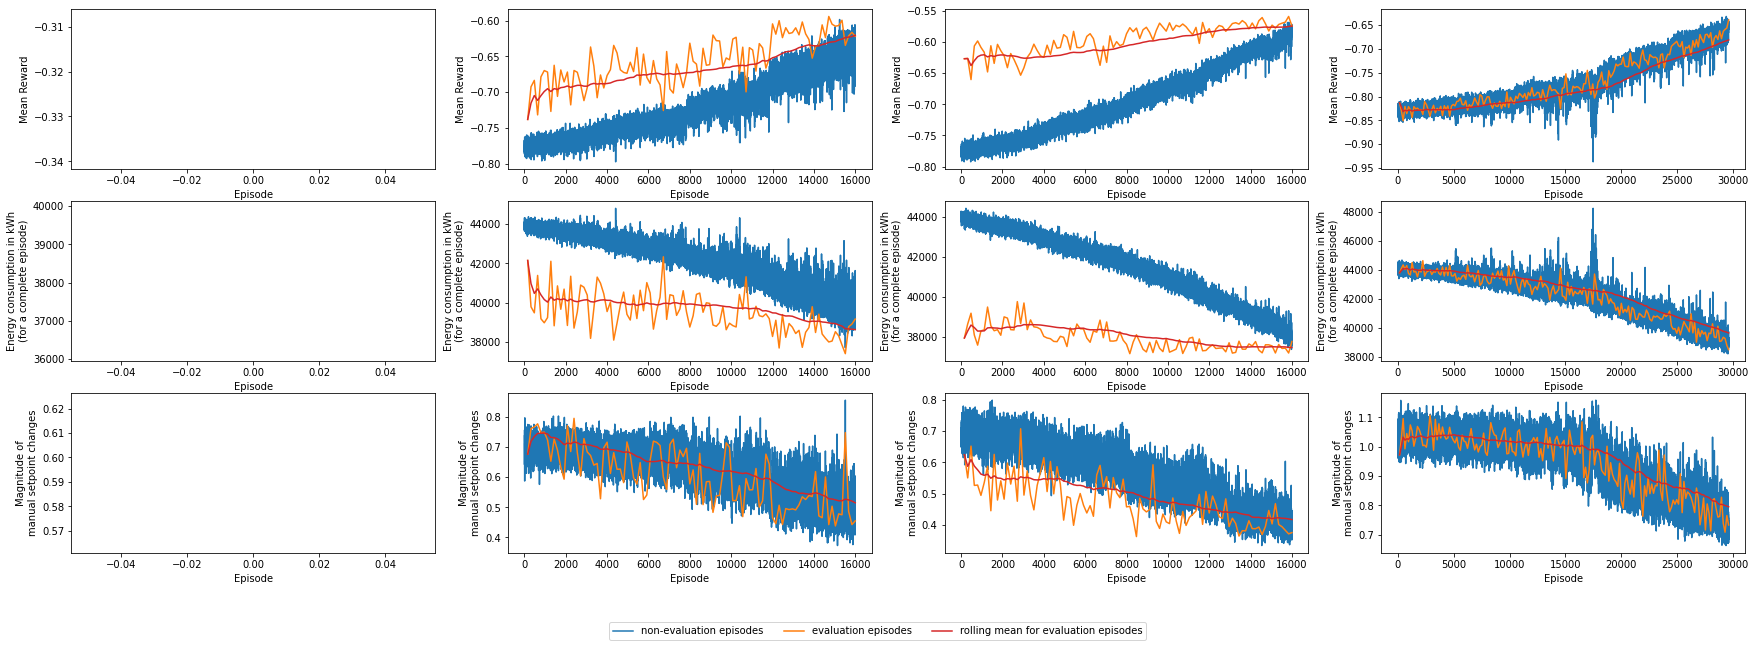

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

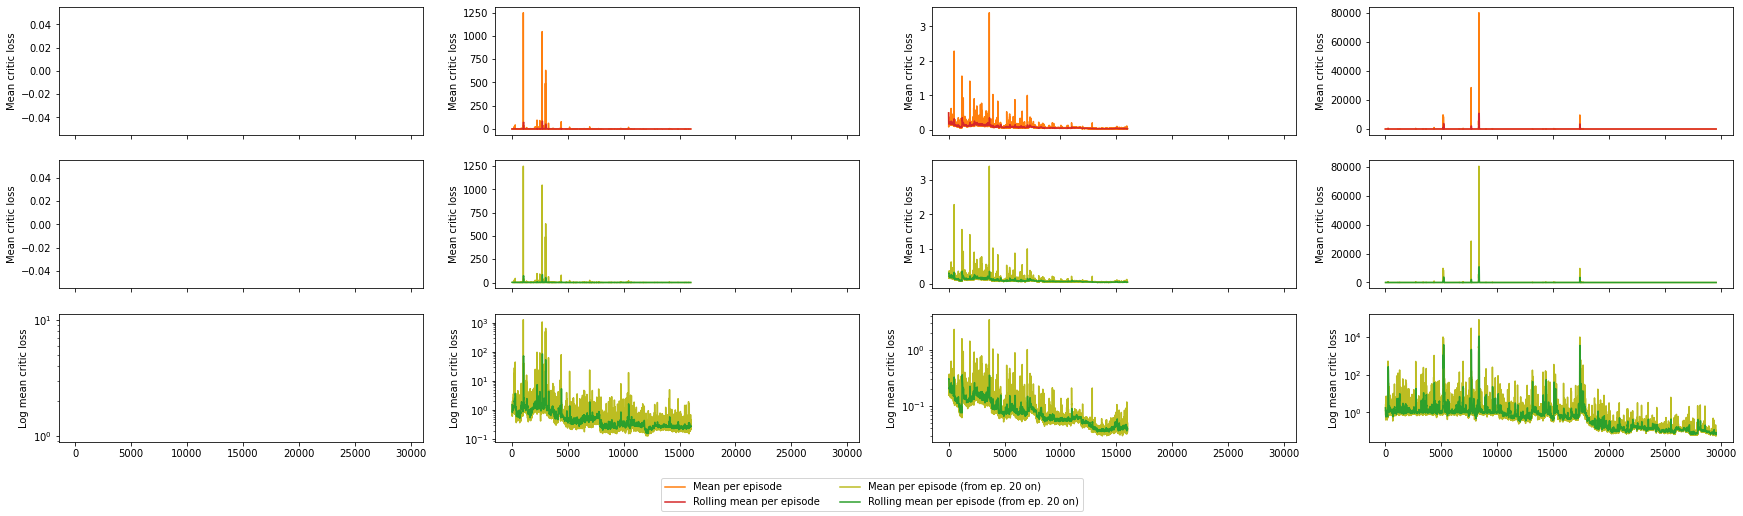

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

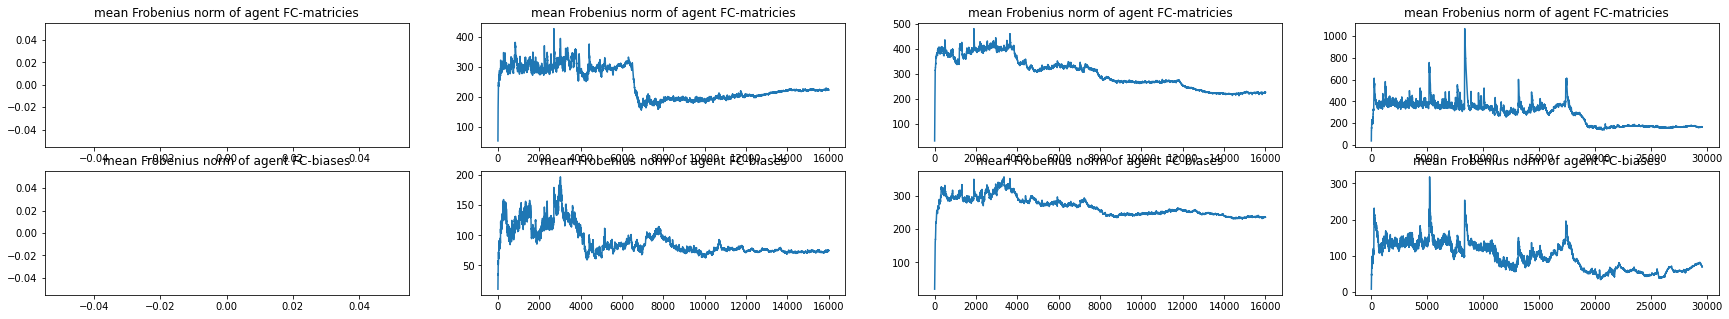

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  15999
Last available evaluation episode for dfs2:  15999
Last available evaluation episode for dfs3:  29599


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 15999: Energy consumption:   39157.02 kWh; Sum of setpoint change magnitudes: 327.2823544682337
For episode 15999: Energy consumption:   37760.38 kWh; Sum of setpoint change magnitudes: 269.9946775477011
For episode 29599: Energy consumption:   38512.85 kWh; Sum of setpoint change magnitudes: 526.8685727646057

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 15999: Reward: -0.62178 kWh; Setpoint change magnit.:  0.45519; Energy cons.: 54460.39532
... 15999: Reward: -0.57412 kWh; Setpoint change magnit.:  0.37551; Energy cons.: 52517.91463
... 29599: Reward: -0.63975 kWh; Setpoint change magnit.:  0.73278; Energy cons.: 53564.45812


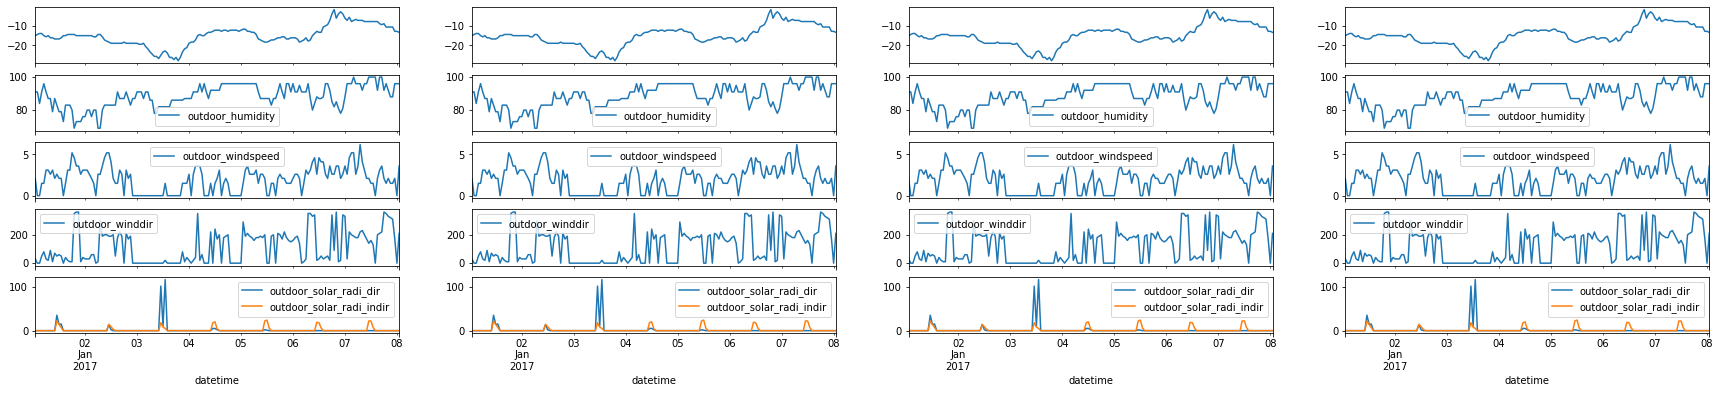

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

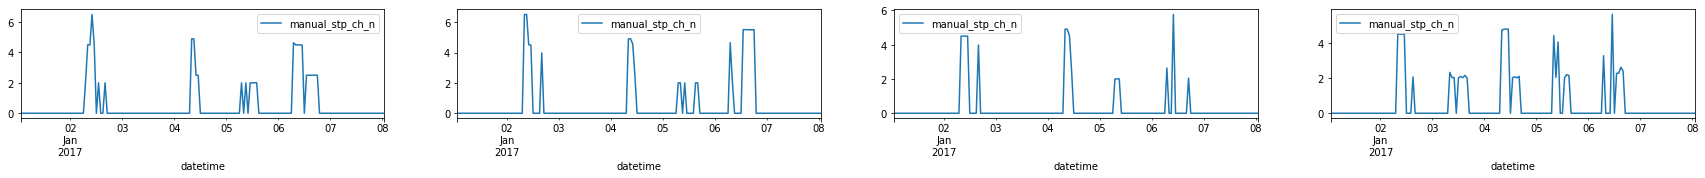

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

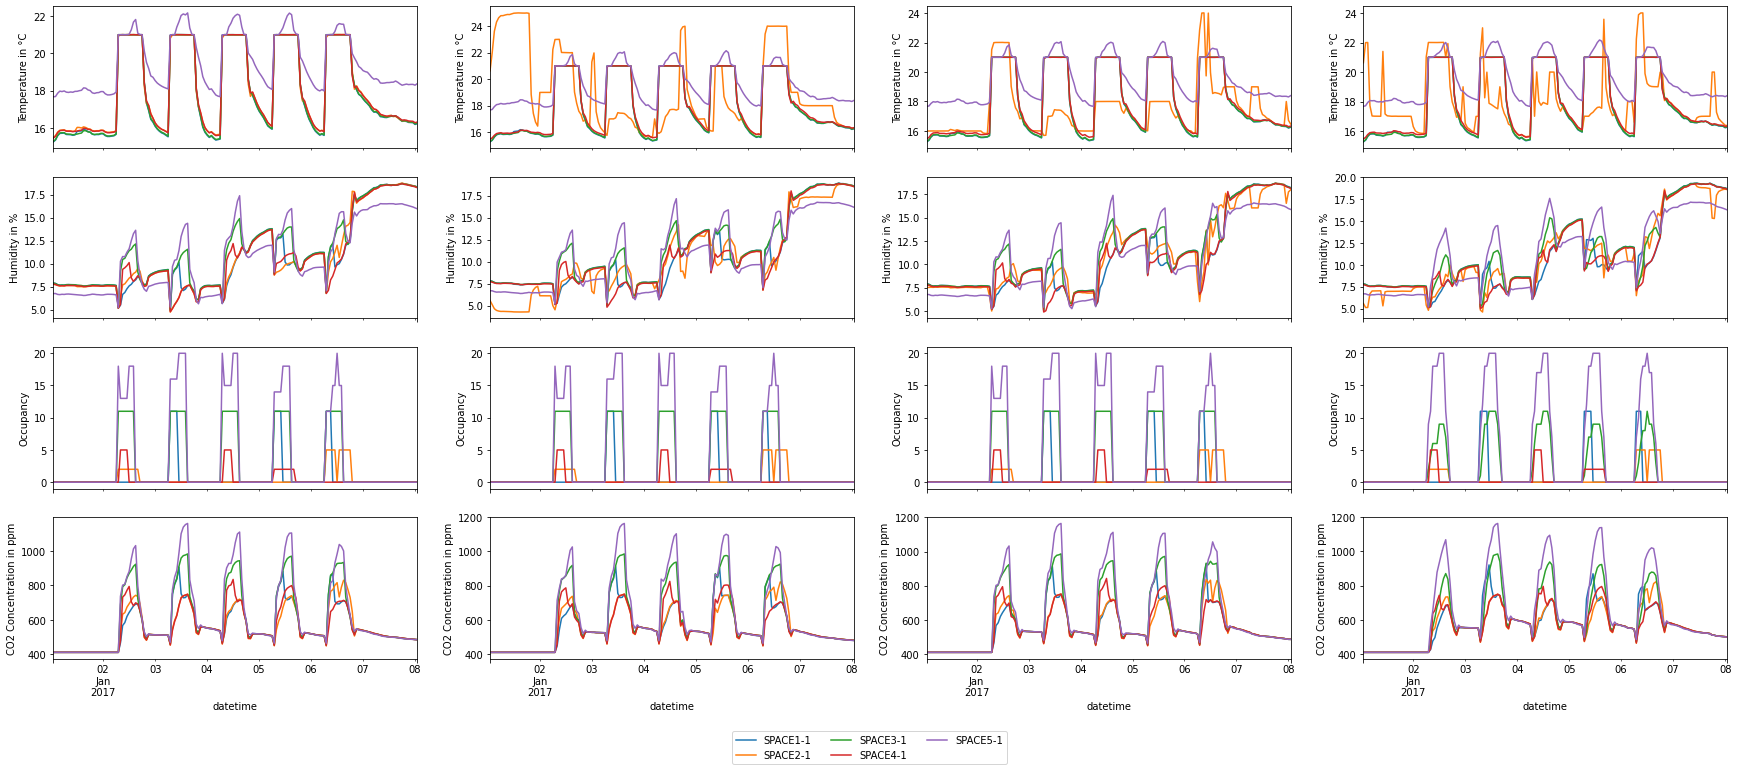

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 



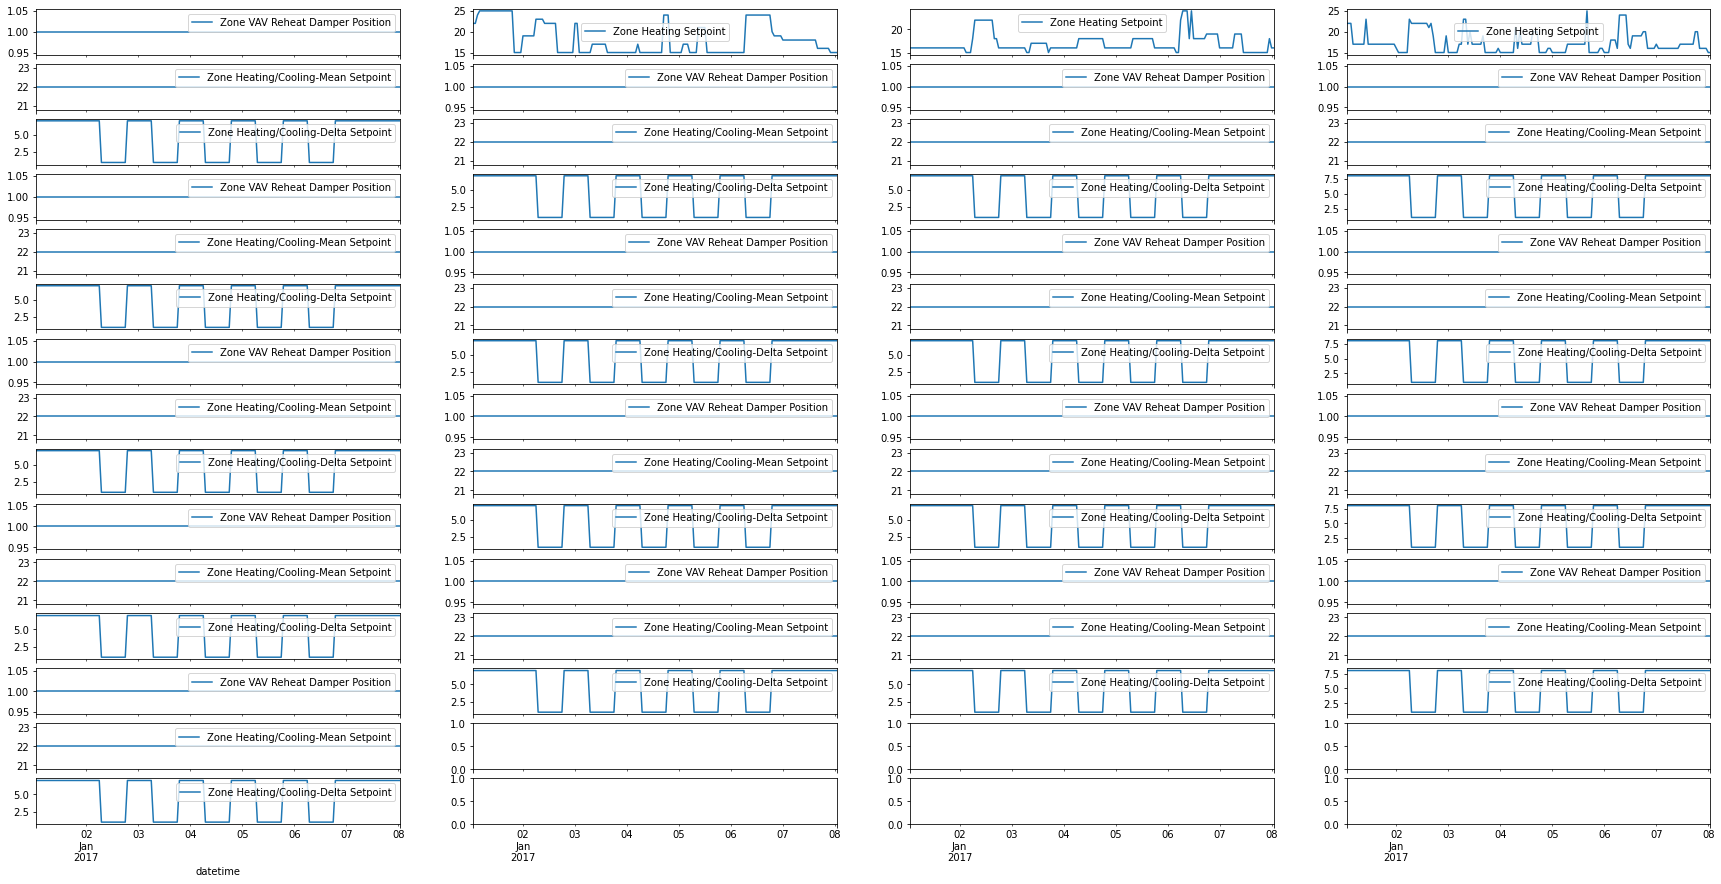

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

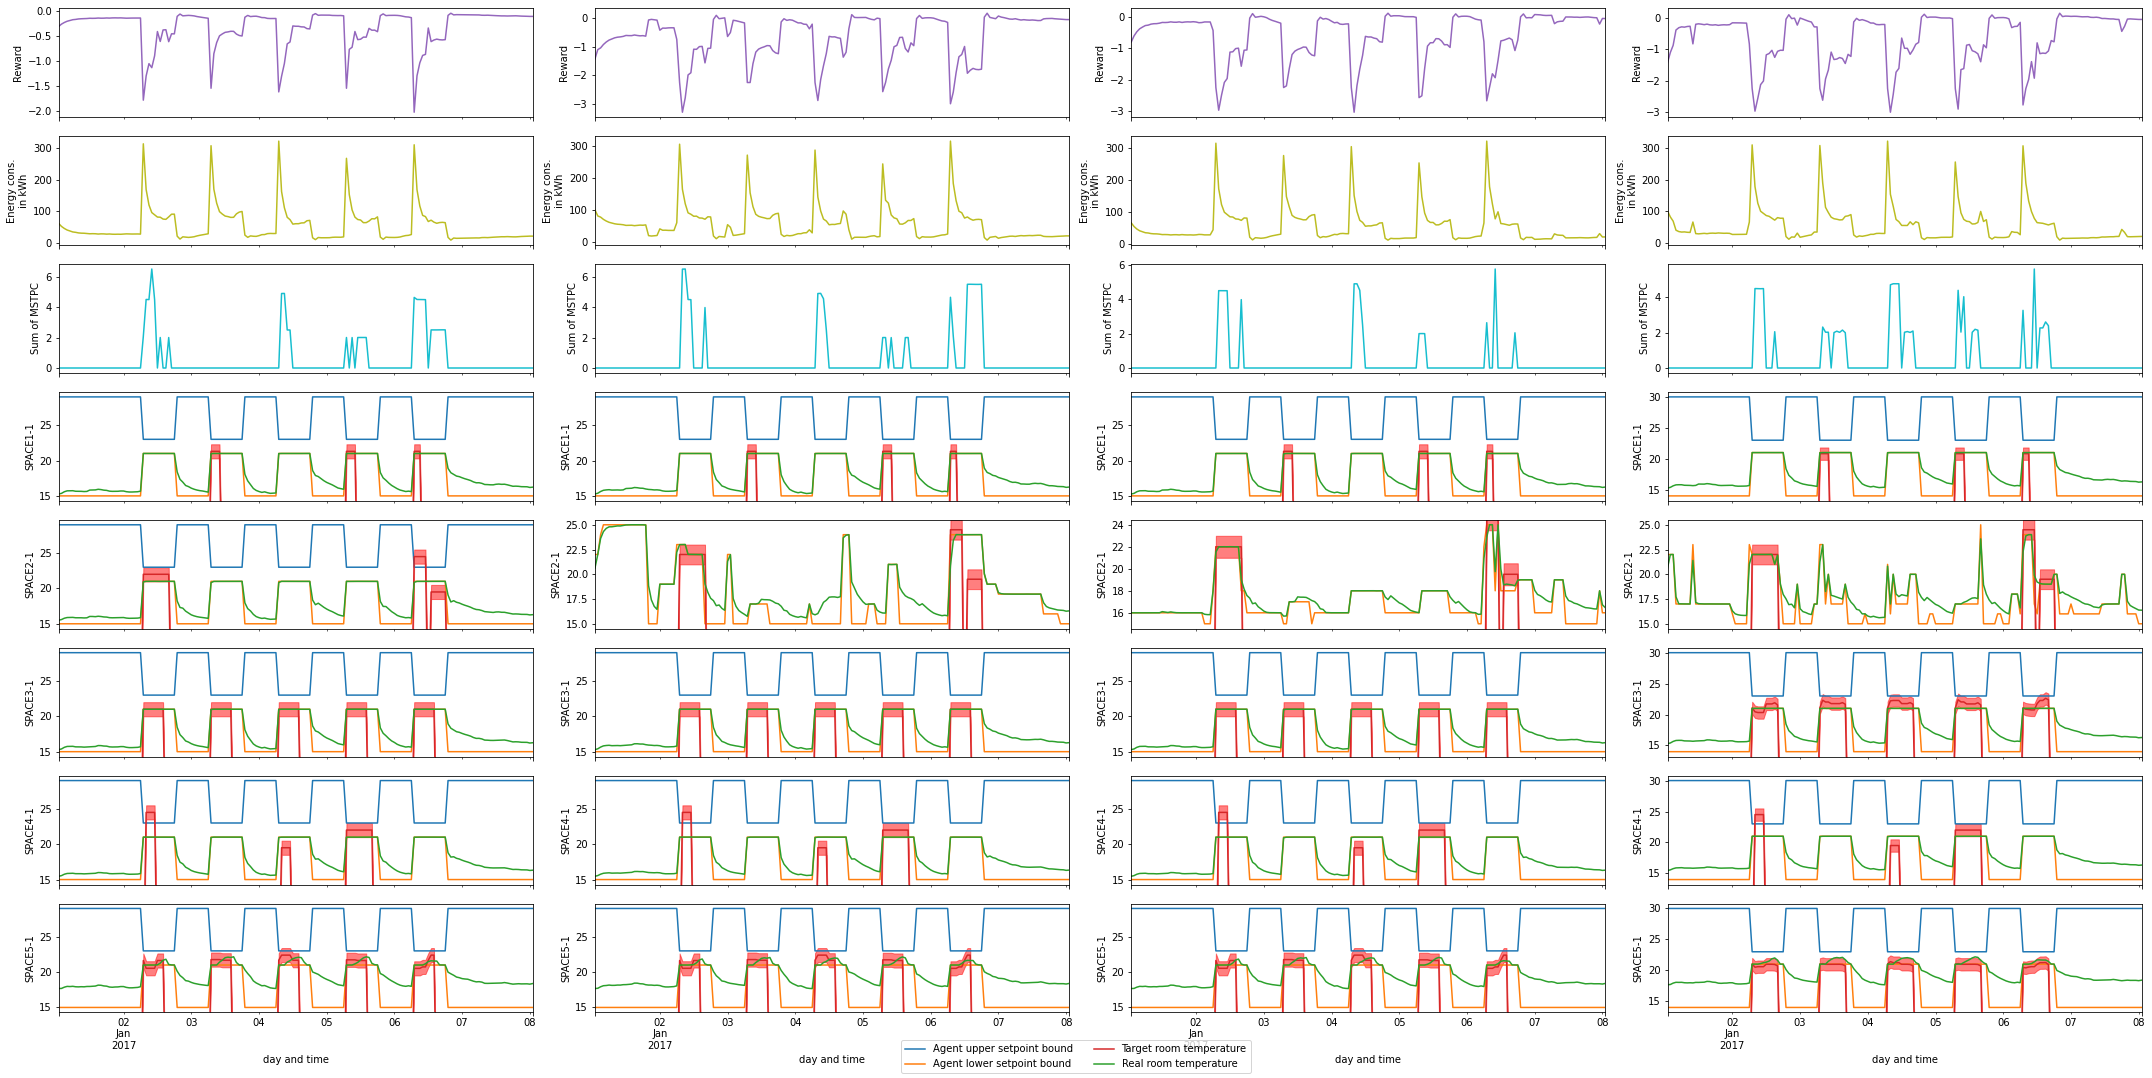

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

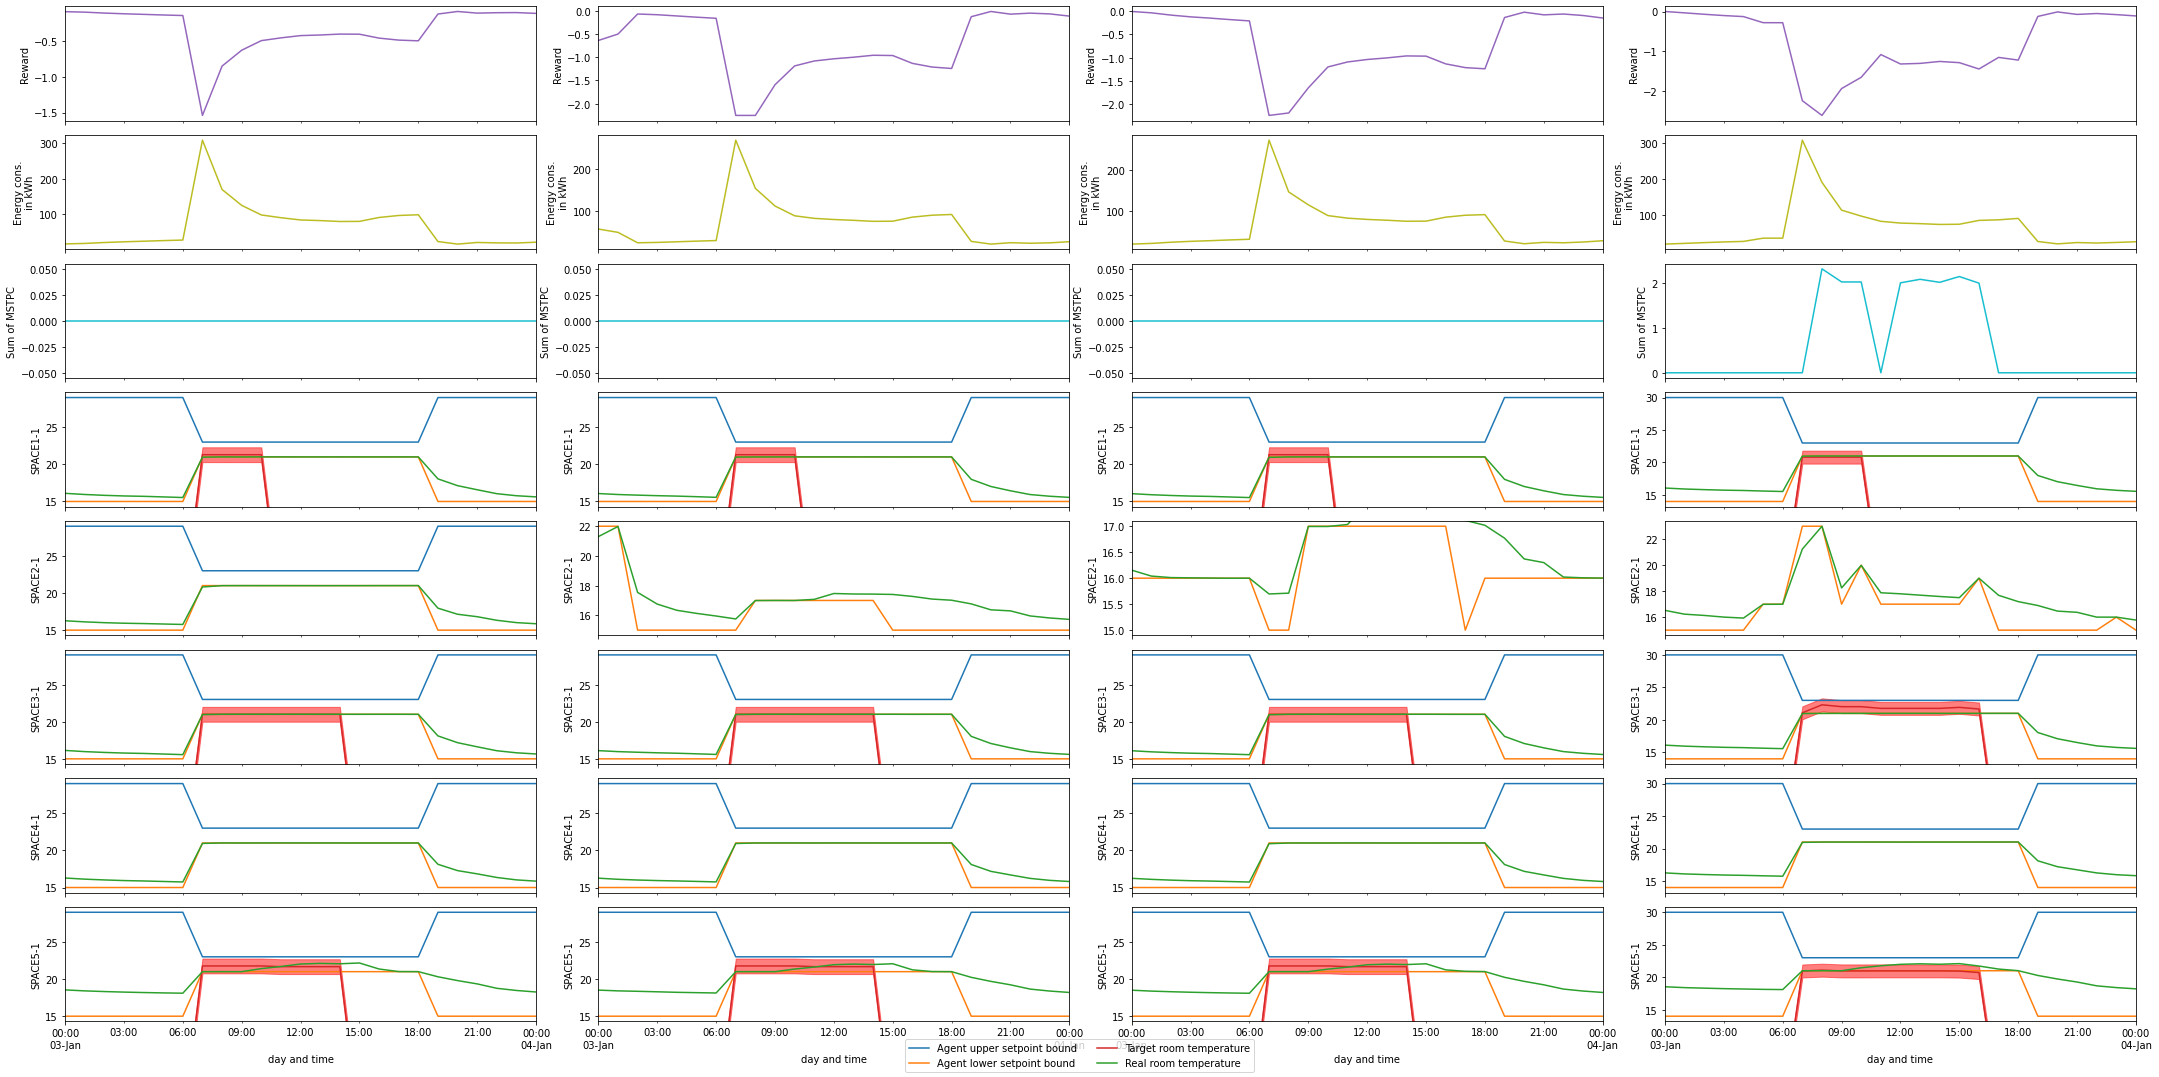

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  53492.6 Wh, mean reward = -0.6067
For plot number 3, mean energy consumption =  51578.0 Wh, mean reward = -0.5597
For plot number 4, mean energy consumption =  52597.3 Wh, mean reward = -0.6265


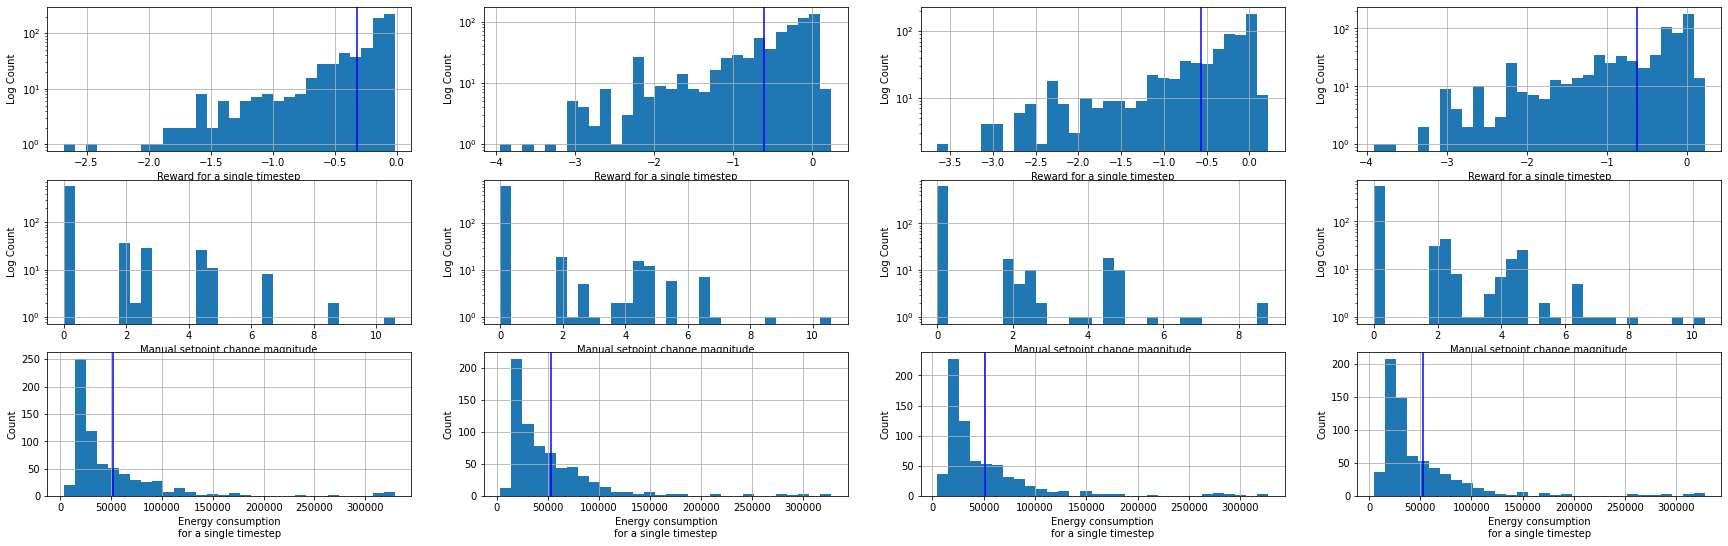

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

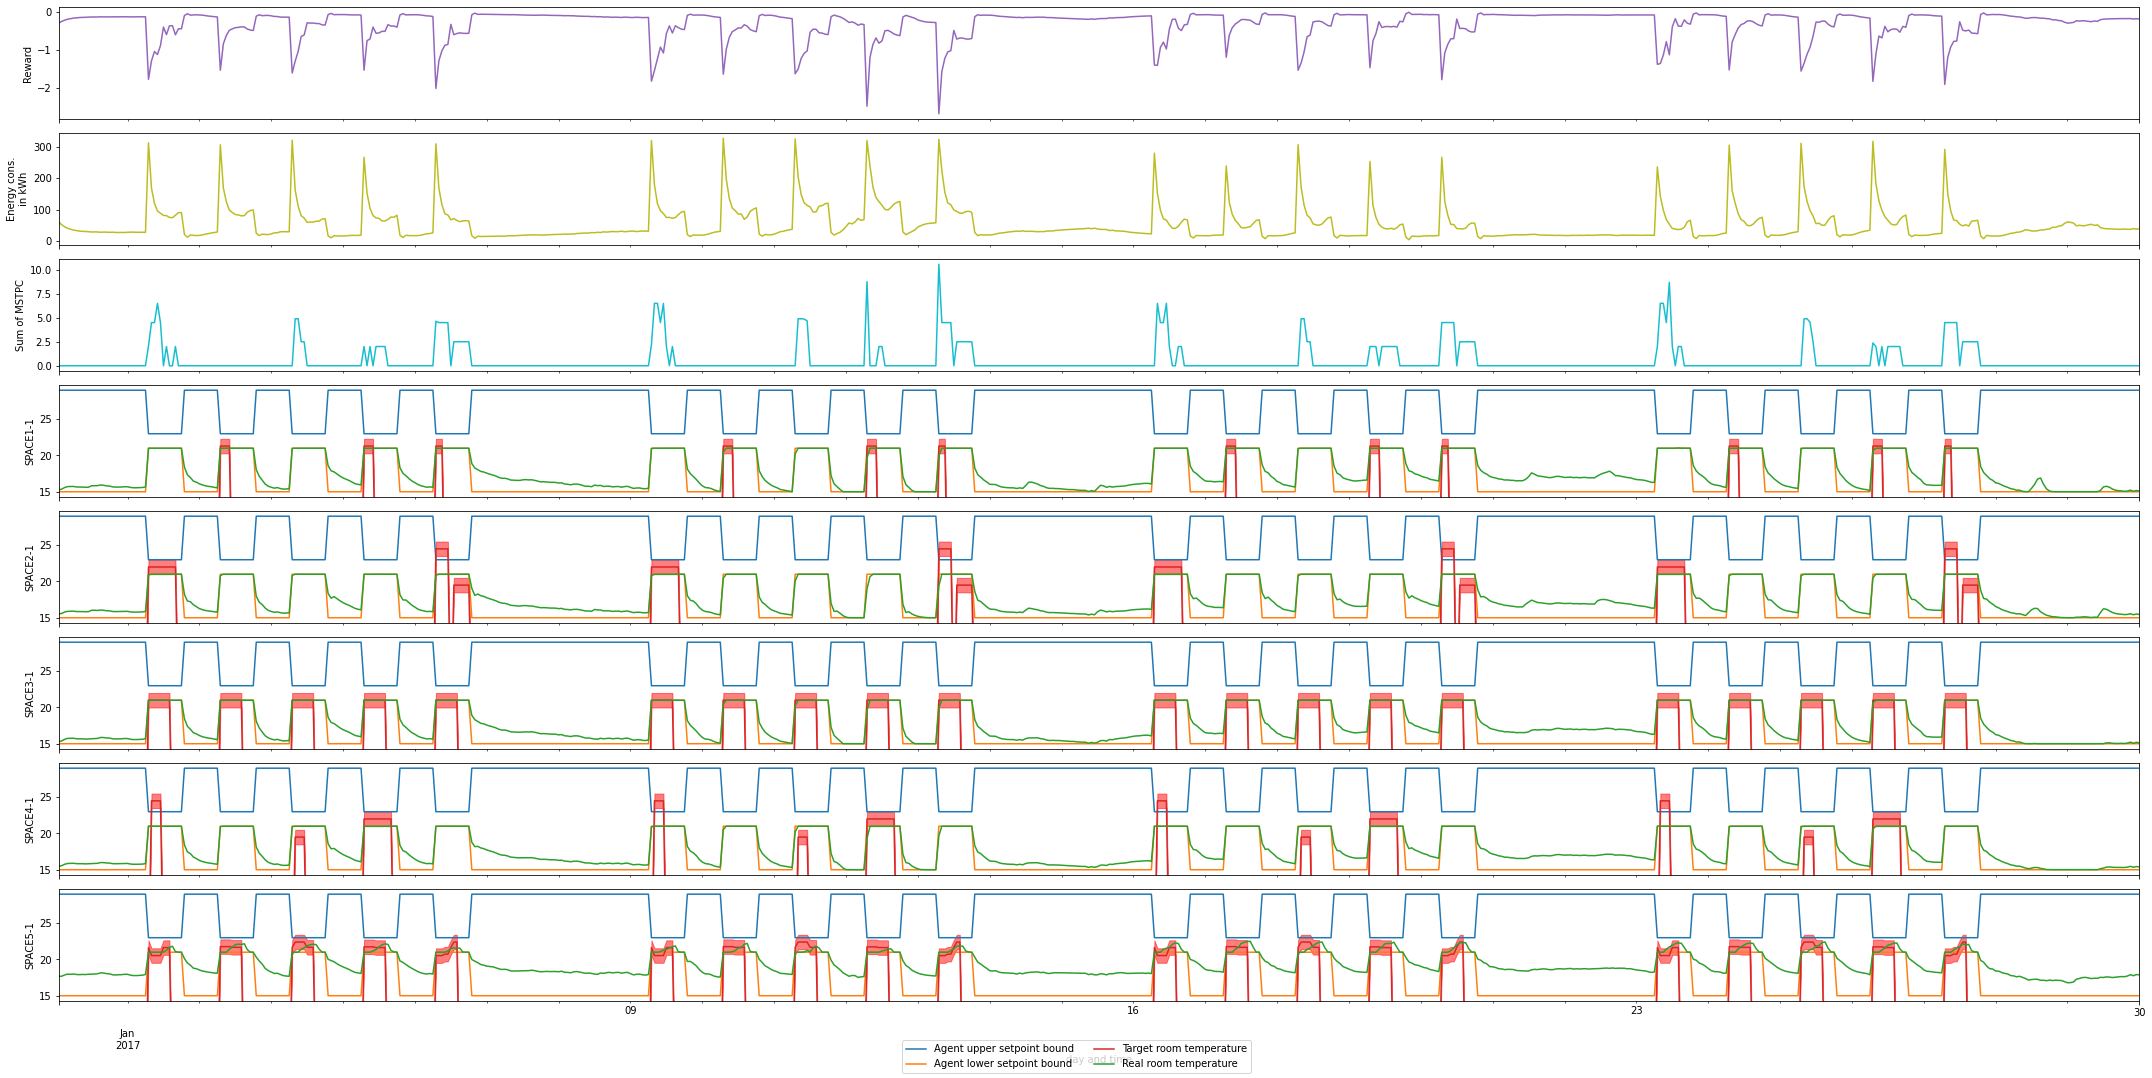

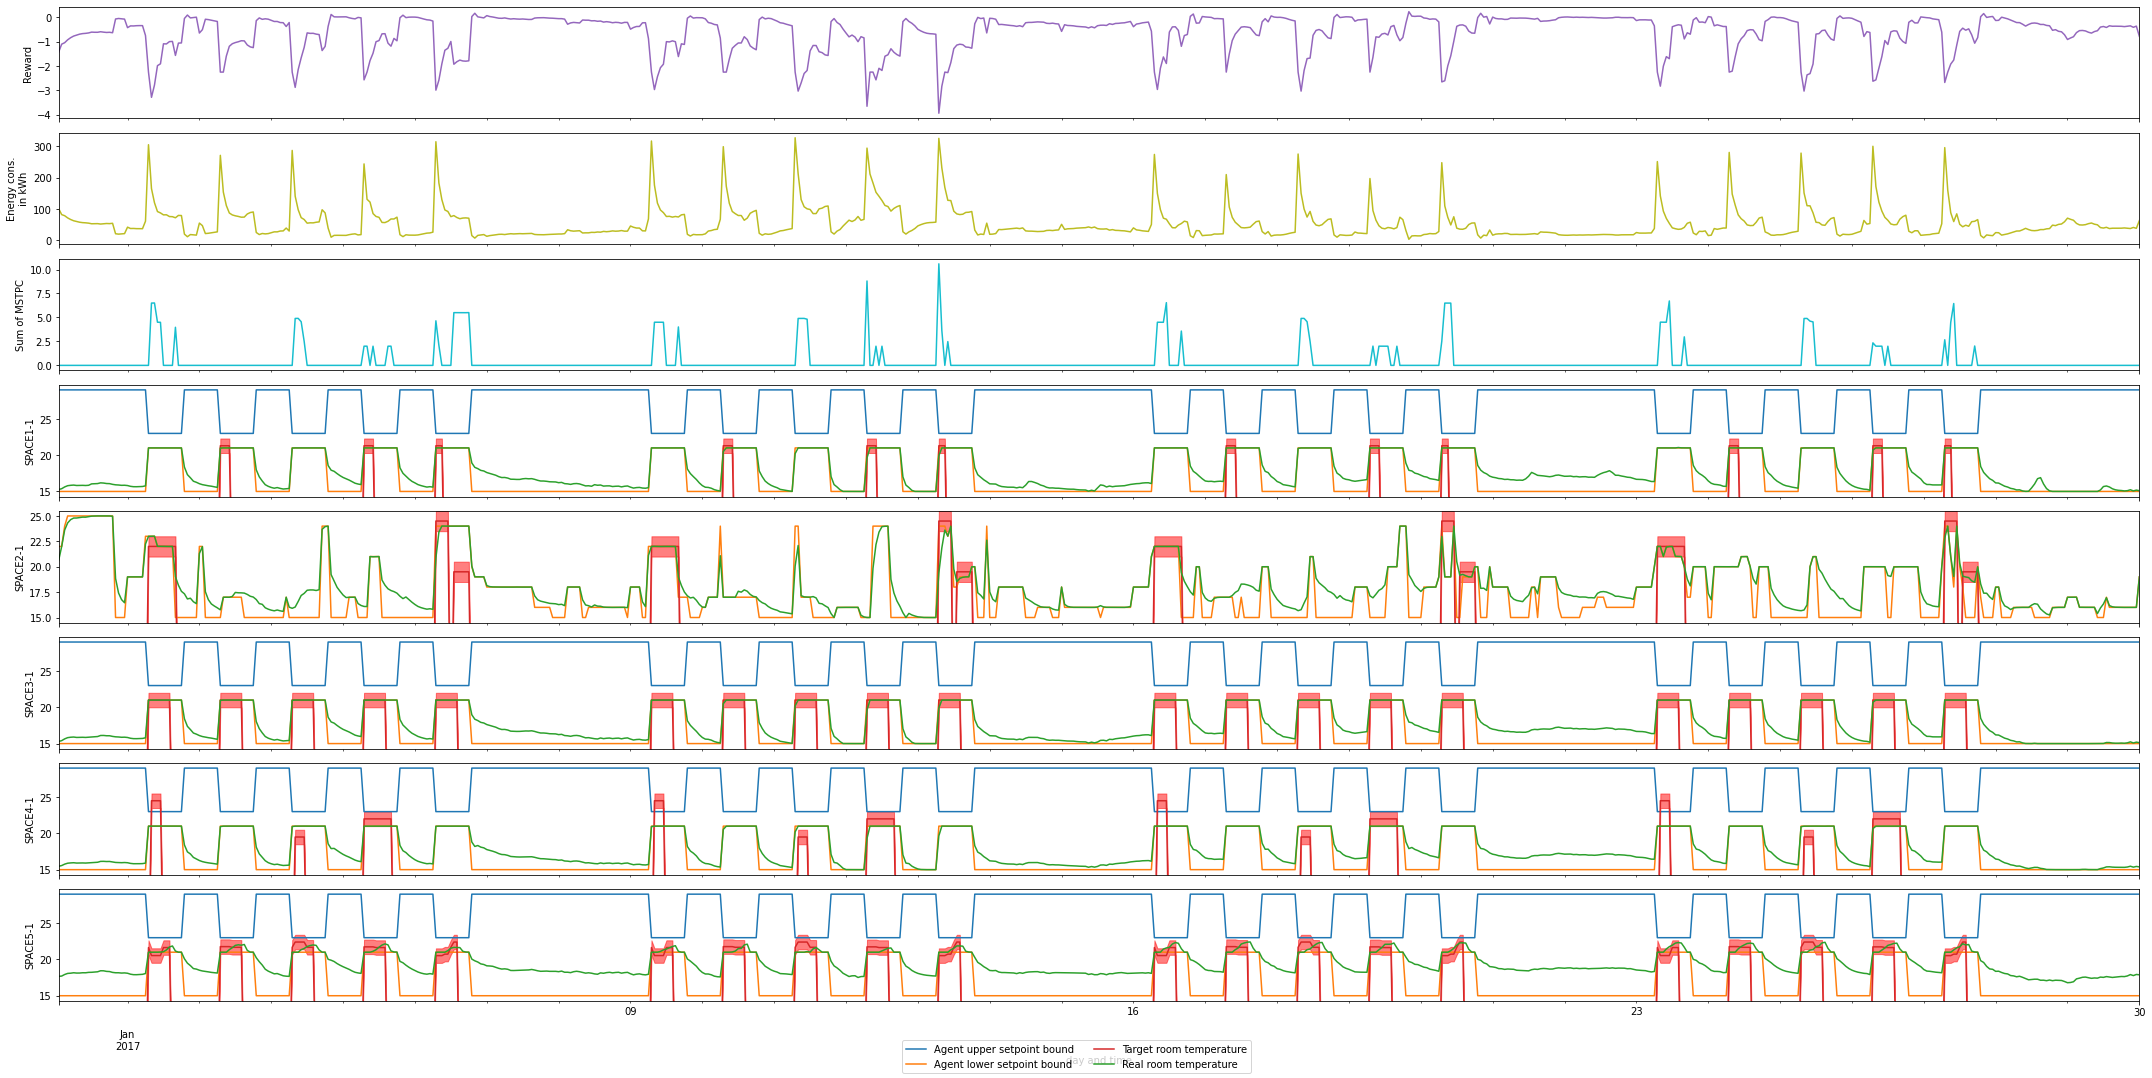

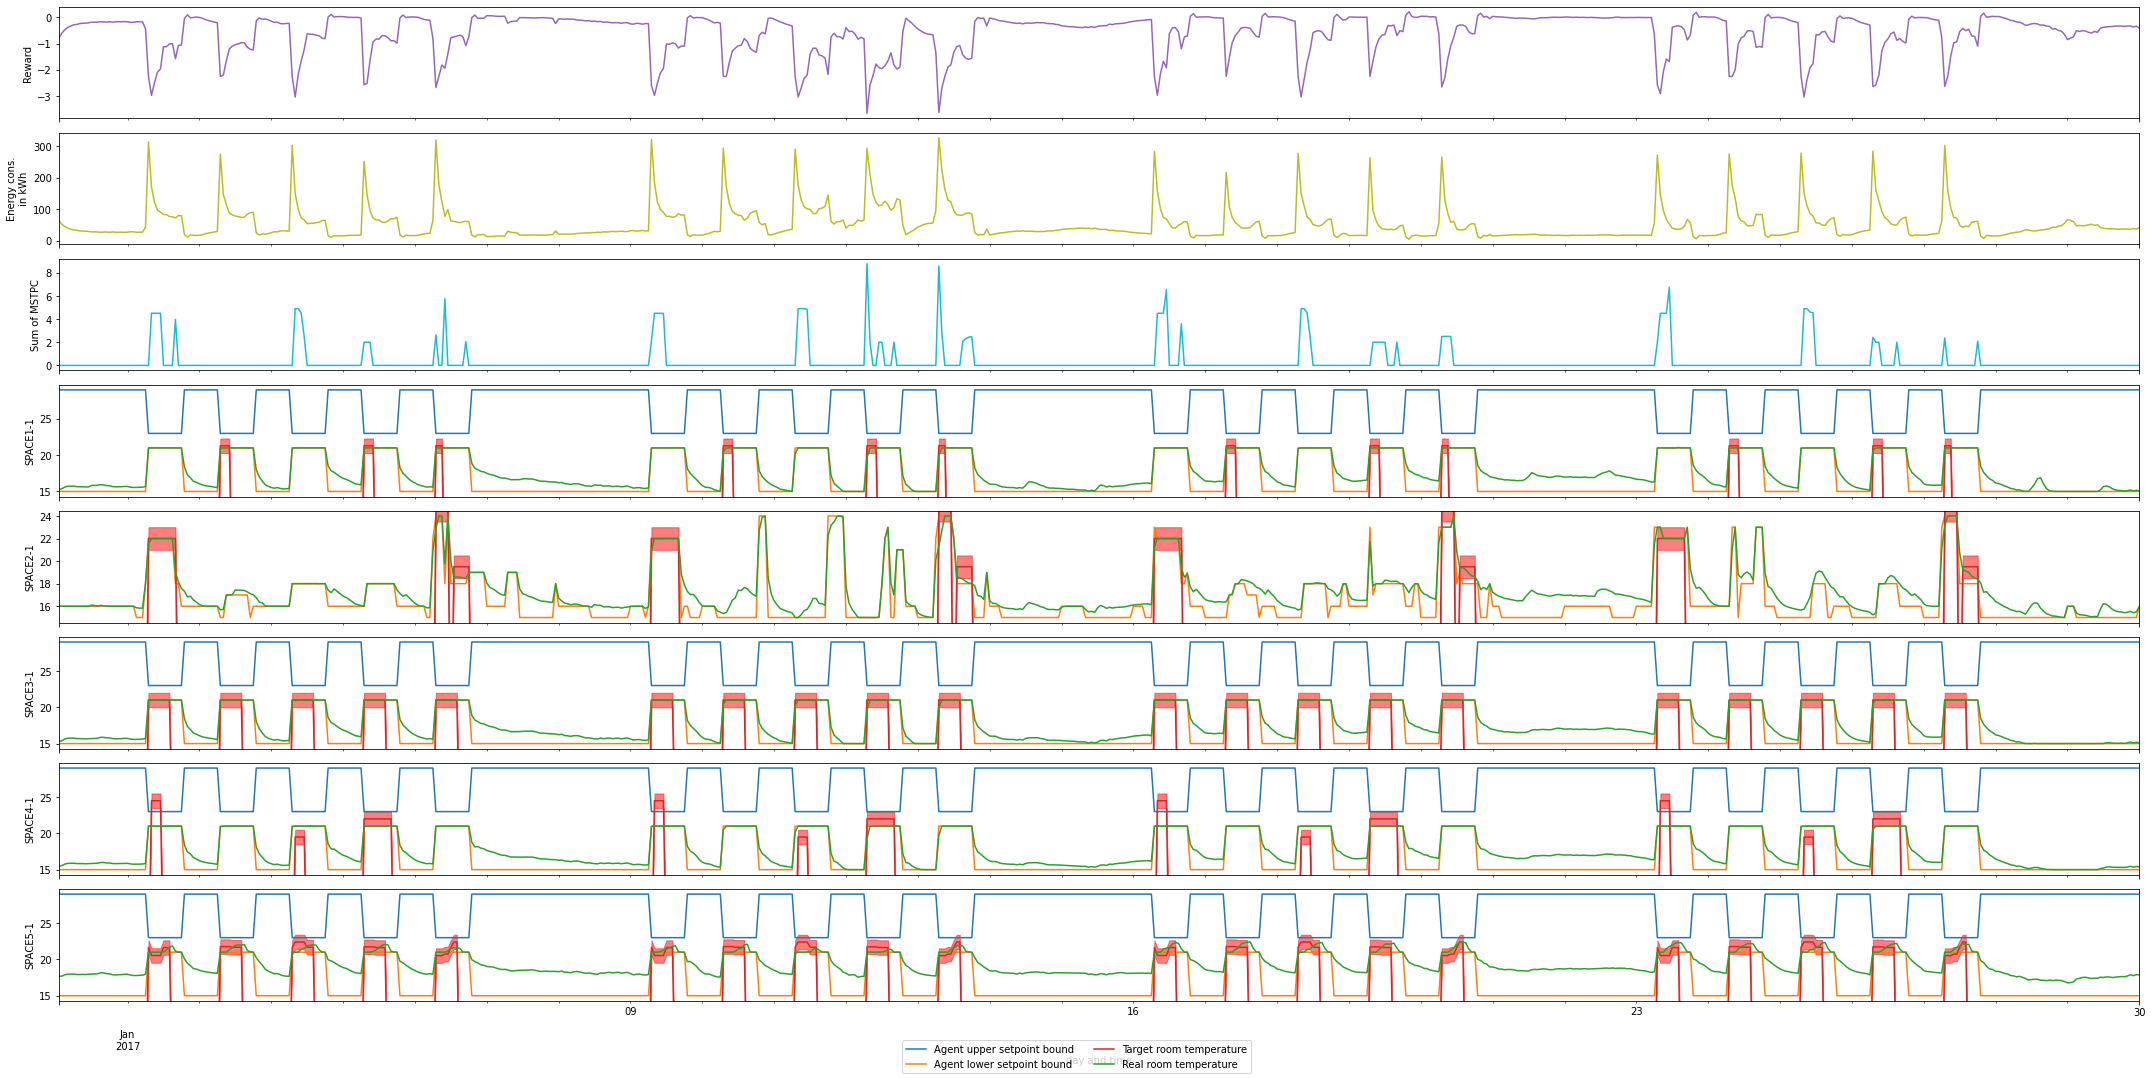

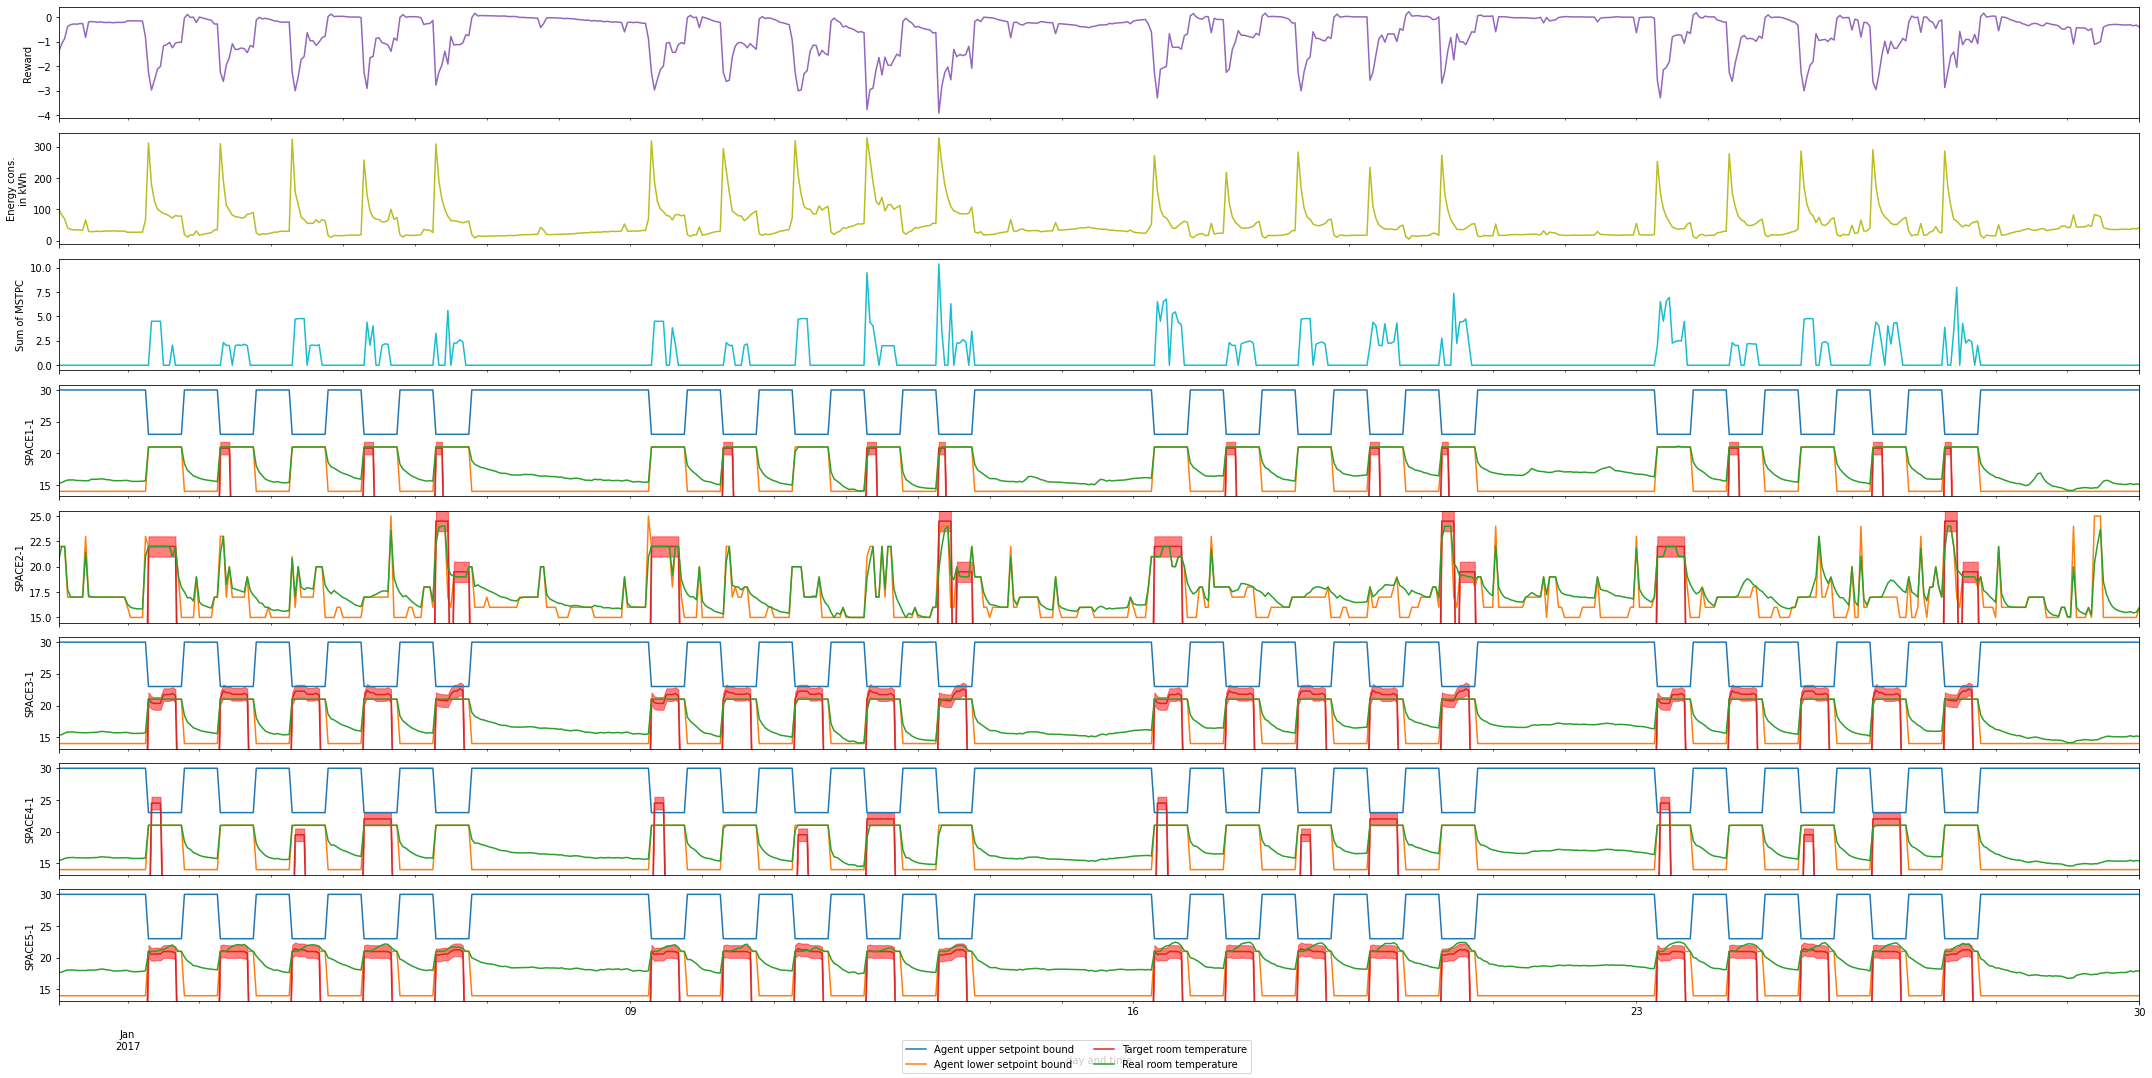

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s302, agent 1
No q-values available for scenario 1: s302, agent 2
No q-values available for scenario 1: s302, agent 3
No q-values available for scenario 1: s302, agent 4
No q-values available for scenario 2: s302-ln, agent 1
No q-values available for scenario 2: s302-ln, agent 2
No q-values available for scenario 2: s302-ln, agent 3
No q-values available for scenario 2: s302-ln, agent 4
No q-values available for scenario 3: s302-longer, agent 1
No q-values available for scenario 3: s302-longer, agent 2
No q-values available for scenario 3: s302-longer, agent 3
No q-values available for scenario 3: s302-longer, agent 4


(<Figure size 2160x648 with 6 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s302\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s302-ln\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s302-longer\nAgent 0'>],
       dtype=object))

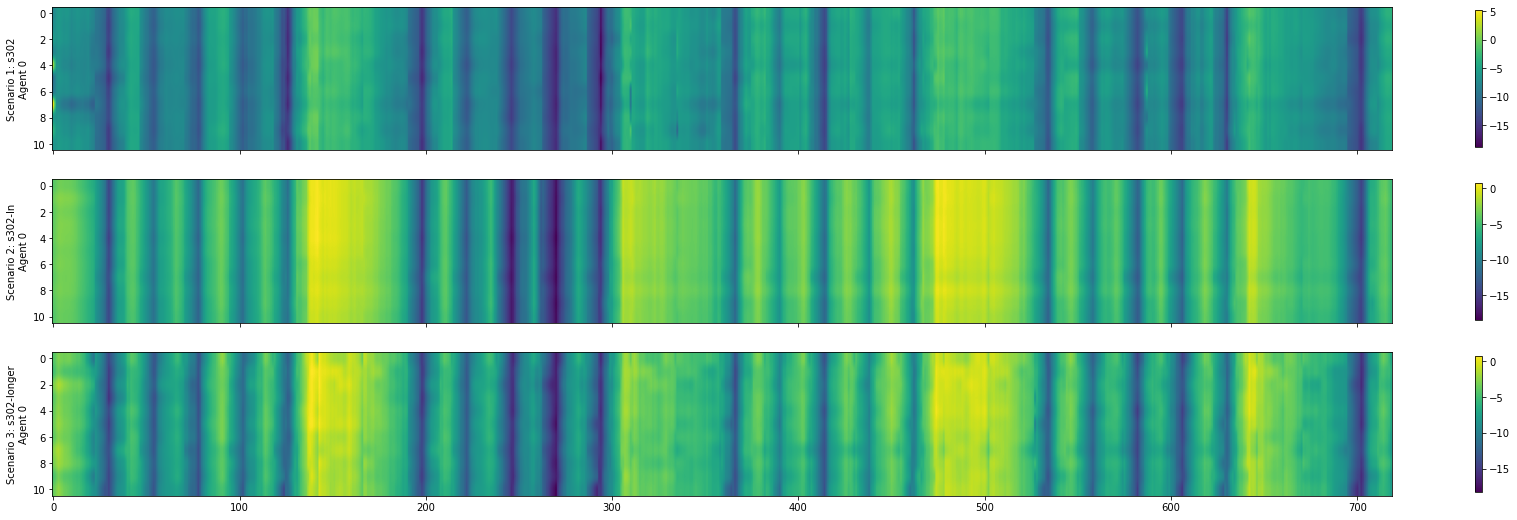

In [33]:
vh.plot_q_values(q_values, fig_width)

<h3>Reward analysis</h3> for s302

In [34]:
clip_level_1 = 125
clip_level_2 = 80
clip_level_3 = 35

In [35]:
def weighted_mean(lst, gamma=0.5):
    output = []
    hist = 0
    for i in range(lst.shape[0]):
        hist = lst.iloc[i] + gamma*hist
        output.append( hist )
    return output

In [36]:
econs = subdfs[-1]['sees'].loc[:, 'energy_Wh']/1000
econs_rolling_exp = weighted_mean(econs, gamma=0.4)

In [37]:
econs_clipped = econs.clip(0,150)
econs_diff    = econs.diff(periods = 1)
econs_diff_cl = econs_diff.clip(-clip_level_1,clip_level_1)
econs_diff_cl2= econs_diff.clip(-clip_level_2,clip_level_2)
econs_diff_cl3= econs_diff.clip(-clip_level_3,clip_level_3)
econs_diff_cPa= ( 2*econs_diff.clip(            0,clip_level_3) + econs.rolling(9,min_periods=0).mean() ) / 3
econs_diff_cPa2=econs_diff.clip(-clip_level_3*2/3,clip_level_3) + econs_rolling_exp
#orig_from_clipped_diff = econs_diff_cl.cumsum()

<AxesSubplot:>

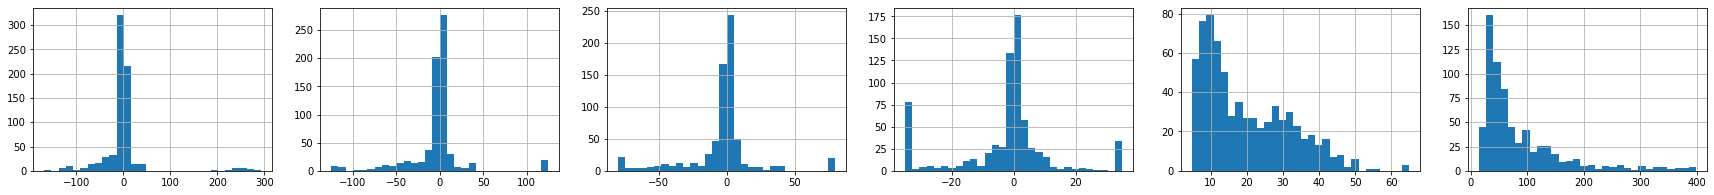

In [38]:
_, ax = plt.subplots(nrows=1,ncols=6, figsize=(fig_width, 3))
econs_diff.hist(bins=30,ax=ax[0])
econs_diff_cl.hist(bins=30,ax=ax[1])
econs_diff_cl2.hist(bins=30,ax=ax[2])
econs_diff_cl3.hist(bins=30,ax=ax[3])
econs_diff_cPa.hist(bins=30,ax=ax[4])
econs_diff_cPa2.hist(bins=30,ax=ax[5])

(0.0, 105.0)

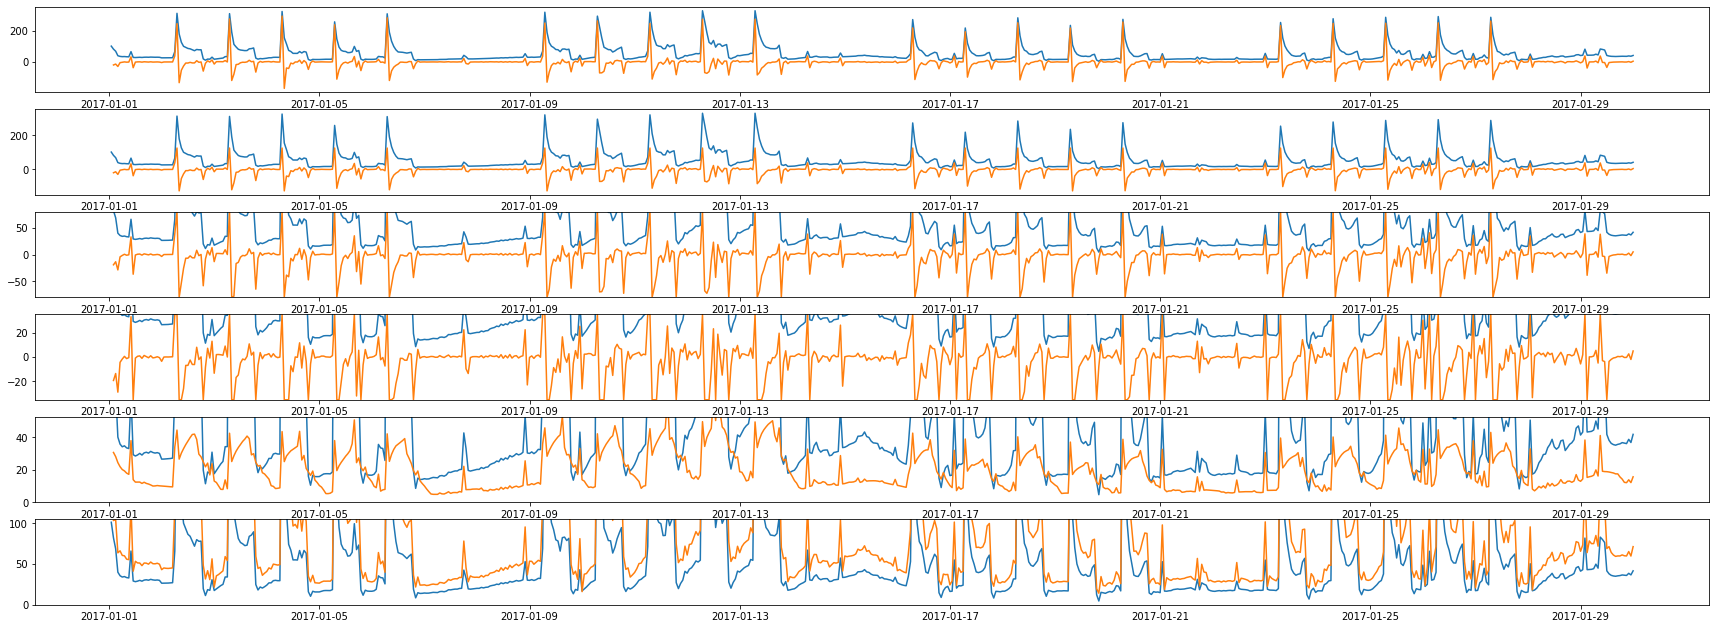

In [39]:
_, ax = plt.subplots(nrows=6, ncols=1, figsize=(fig_width, 11))
ax[0].plot(econs)
ax[0].plot(econs_diff)
ax[1].plot(econs)
ax[1].plot(econs_diff_cl)
ax[2].plot(econs)
ax[2].plot(econs_diff_cl2)
ax[2].set_ylim(-clip_level_2, clip_level_2)
ax[3].plot(econs)
ax[3].plot(econs_diff_cl3)
ax[3].set_ylim(-clip_level_3, clip_level_3)
ax[4].plot(econs)
ax[4].plot(econs_diff_cPa)
ax[4].set_ylim(0, clip_level_3*1.5)
ax[5].plot(econs)
ax[5].plot(econs_diff_cPa2)
ax[5].set_ylim(0, clip_level_3*3)

Outputs for thesis

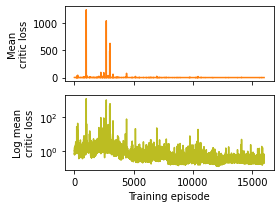

In [40]:
p, _ = vh.export_loss_plot(alldfs[1])
p.tight_layout()
p.savefig("saved_plots/MA_s302_loss.png")
p.savefig("saved_plots/MA_s302_loss.pdf")

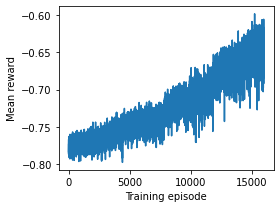

In [41]:
p, _ = vh.export_reward_plot(alldfs[1])
p.tight_layout()
p.savefig("saved_plots/MA_s302_reward.png")
p.savefig("saved_plots/MA_s302_reward.pdf")

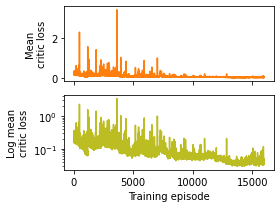

In [42]:
p, _ = vh.export_loss_plot(alldfs[2])
p.tight_layout()
p.savefig("saved_plots/MA_s302LN_loss.png")
p.savefig("saved_plots/MA_s302LN_loss.pdf")

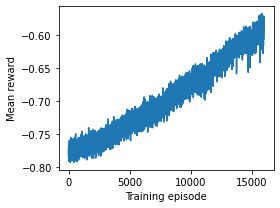

In [43]:
p, _ = vh.export_reward_plot(alldfs[2])
p.tight_layout()
p.savefig("saved_plots/MA_s302LN_reward.png")
p.savefig("saved_plots/MA_s302LN_reward.pdf")

In [44]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [45]:
subdfs_rooms[2] = ['SPACE2-1']

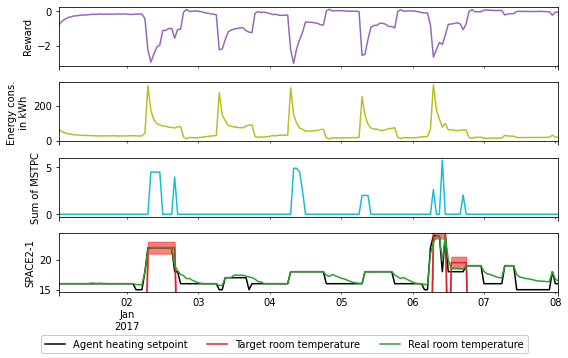

In [50]:
p, _ = vh.complete_plot_total_overview(subdfs[2], 8, subdfs_rooms[2], subdfs_agents[2], fig_height=5, n_rows=4, heating_setpoint_color='k', framealpha=1, cols_legend=3)
p.show()
p.tight_layout()
p.savefig("saved_plots/MA_s302LN_TestWeek_overview.png")
p.savefig("saved_plots/MA_s302LN_TestWeek_overview.pdf")

In [48]:
subdfs_rooms[1] = ['SPACE2-1']

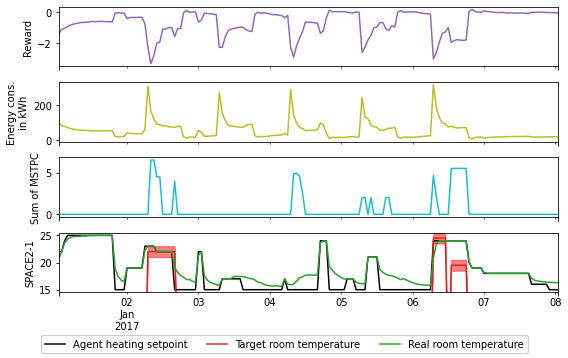

In [51]:
p, _ = vh.complete_plot_total_overview(subdfs[1], 8, subdfs_rooms[1], subdfs_agents[1], fig_height=5, n_rows=4, heating_setpoint_color='k', framealpha=1, cols_legend=3)
p.show()
p.tight_layout()
p.savefig("saved_plots/MA_s302_TestWeek_overview.png")
p.savefig("saved_plots/MA_s302_TestWeek_overview.pdf")